In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import scipy.stats as st
from scipy import stats

np.random.seed(41)

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
RANDOM_SEED = 110011

In [2]:
adata = sc.read_h5ad('data/h5ab_folder/GSE_158055_COVID19_ALL.h5ad')
adata

AnnData object with n_obs × n_vars = 1462702 × 27943
    obs: 'celltype', 'majorType', 'sampleID', 'PatientID', 'datasets', 'City', 'Age', 'Sex', 'Sample type', 'CoVID-19 severity', 'Sample time', 'Sampling day (Days after symptom onset)', 'SARS-CoV-2', 'Single cell sequencing platform', 'BCR single cell sequencing', 'TCR single cell sequencing', 'Outcome', 'Comorbidities', 'COVID-19-related medication and anti-microbials', 'Leukocytes [G/L]', 'Neutrophils [G/L]', 'Lymphocytes [G/L]', 'Unpublished'
    uns: 'neighbors', 'pca'
    obsm: 'X_pca', 'X_tsne', 'har_emb'
    obsp: 'connectivities', 'distances'

In [3]:
adata.obs['CoVID-19 severity'].unique()

['severe/critical', 'mild/moderate', 'control']
Categories (3, object): ['control', 'mild/moderate', 'severe/critical']

In [4]:
adata.obs

,celltype,majorType,sampleID,PatientID,datasets,City,Age,Sex,Sample type,CoVID-19 severity,...,Single cell sequencing platform,BCR single cell sequencing,TCR single cell sequencing,Outcome,Comorbidities,COVID-19-related medication and anti-microbials,Leukocytes [G/L],Neutrophils [G/L],Lymphocytes [G/L],Unpublished
AACAGGGGTCGGATTT-0,Mono_c1-CD14-CCL3,Mono,S-S070-1,P-S070,d01,Zhuhai,32,F,frozen PBMC,severe/critical,...,10X 3',No,No,discharged,none,"Moxifloxacin, Lopinavir/ ritonavir tablet, Chl...",2.8,1.92,0.61,PMID: 32759967
AACCAACGTCCGAAAG-0,B_c02-MS4A1-CD27,B,S-S070-1,P-S070,d01,Zhuhai,32,F,frozen PBMC,severe/critical,...,10X 3',No,No,discharged,none,"Moxifloxacin, Lopinavir/ ritonavir tablet, Chl...",2.8,1.92,0.61,PMID: 32759967
AACCTTTGTAGCACGA-0,B_c01-TCL1A,B,S-S070-1,P-S070,d01,Zhuhai,32,F,frozen PBMC,severe/critical,...,10X 3',No,No,discharged,none,"Moxifloxacin, Lopinavir/ ritonavir tablet, Chl...",2.8,1.92,0.61,PMID: 32759967
AAGCATCTCTATCGCC-0,Mono_c2-CD14-HLA-DPB1,Mono,S-S070-1,P-S070,d01,Zhuhai,32,F,frozen PBMC,severe/critical,...,10X 3',No,No,discharged,none,"Moxifloxacin, Lopinavir/ ritonavir tablet, Chl...",2.8,1.92,0.61,PMID: 32759967
AATCACGGTCATAAAG-0,B_c01-TCL1A,B,S-S070-1,P-S070,d01,Zhuhai,32,F,frozen PBMC,severe/critical,...,10X 3',No,No,discharged,none,"Moxifloxacin, Lopinavir/ ritonavir tablet, Chl...",2.8,1.92,0.61,PMID: 32759967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCCACGCAG-283,Mega,Mega,S-S053,P-S053,d17,Beijing,46,F,frozen PBMC,severe/critical,...,10X 5',No,Yes,discharged,Hypertension,"Traditional Chinese medicine, Antiviral therapy",unknown,unknown,unknown,Yes
TTTGTCATCCGCTGTT-283,B_c06-MKI67,Plasma,S-S053,P-S053,d17,Beijing,46,F,frozen PBMC,severe/critical,...,10X 5',No,Yes,discharged,Hypertension,"Traditional Chinese medicine, Antiviral therapy",unknown,unknown,unknown,Yes
TTTGTCATCGTCGTTC-283,T_CD8_c01-LEF1,CD8,S-S053,P-S053,d17,Beijing,46,F,frozen PBMC,severe/critical,...,10X 5',No,Yes,discharged,Hypertension,"Traditional Chinese medicine, Antiviral therapy",unknown,unknown,unknown,Yes
TTTGTCATCTGTACGA-283,NK_c01-FCGR3A,NK,S-S053,P-S053,d17,Beijing,46,F,frozen PBMC,severe/critical,...,10X 5',No,Yes,discharged,Hypertension,"Traditional Chinese medicine, Antiviral therapy",unknown,unknown,unknown,Yes


In [5]:
# Count unique values in Sample type with repect to each SampleID.
adata.obs.groupby('sampleID')['Sample type'].unique().value_counts()

[frozen PBMC]                                                   89
[fresh PBMC]                                                    83
[B cells sorted from frozen PBMC (MACS, STEMCELL 19054)]        34
[fresh Sputum]                                                  22
[CD19+ B cell sorted from fresh PBMC (FACS)]                    13
[CD3+ T cell sorted from fresh PBMC (FACS)]                     13
[fresh BALF]                                                    12
[CD3+ T cell and CD19+ B cell sorted from fresh PBMC (FACS)]    11
[CD19+ B cell sorted from fresh PBMC (MACS)]                     6
[fresh PFMC]                                                     1
Name: Sample type, dtype: int64

In [6]:
# Count unique values in oVID-19 severity type with repect to each SampleID.
adata.obs.groupby('sampleID')['CoVID-19 severity'].unique().value_counts()

[severe/critical]    134
[mild/moderate]      122
[control]             28
Name: CoVID-19 severity, dtype: int64

In [7]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:24:46)


In [8]:
adata

AnnData object with n_obs × n_vars = 1462702 × 27943
    obs: 'celltype', 'majorType', 'sampleID', 'PatientID', 'datasets', 'City', 'Age', 'Sex', 'Sample type', 'CoVID-19 severity', 'Sample time', 'Sampling day (Days after symptom onset)', 'SARS-CoV-2', 'Single cell sequencing platform', 'BCR single cell sequencing', 'TCR single cell sequencing', 'Outcome', 'Comorbidities', 'COVID-19-related medication and anti-microbials', 'Leukocytes [G/L]', 'Neutrophils [G/L]', 'Lymphocytes [G/L]', 'Unpublished'
    uns: 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_tsne', 'har_emb', 'X_umap'
    obsp: 'connectivities', 'distances'

In [9]:
# Save the adata object
#adata.write('data/h5ab_folder/GSE_158055_COVID19_ALL_umap.h5ad')

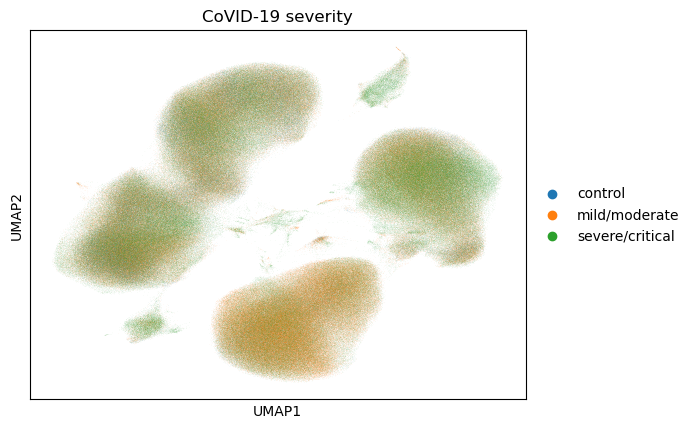

In [12]:
sc.pl.umap(adata, color=['CoVID-19 severity'])